In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


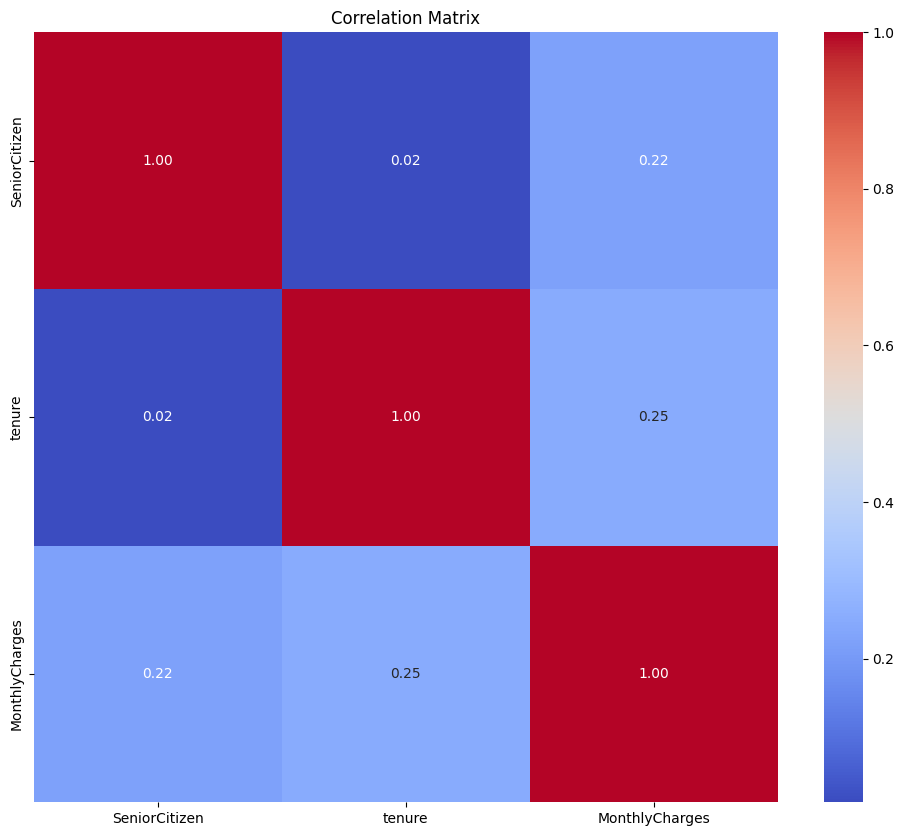

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [6]:
df = df.drop(df.columns[0], axis =1)   #to remove customer id column

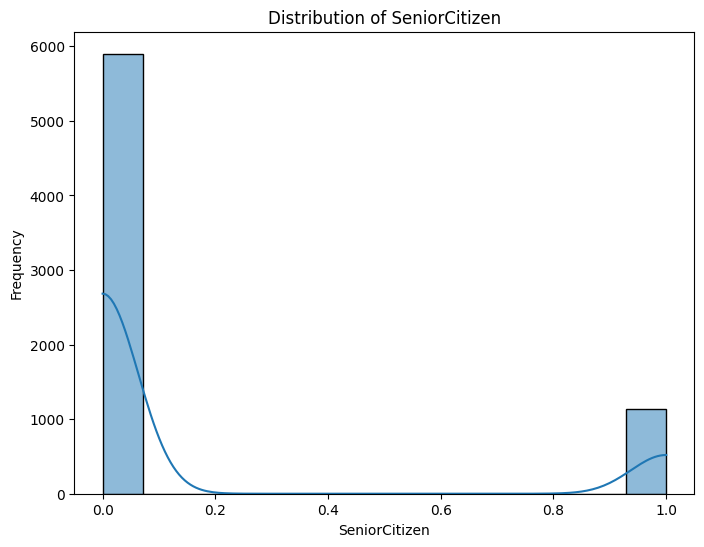

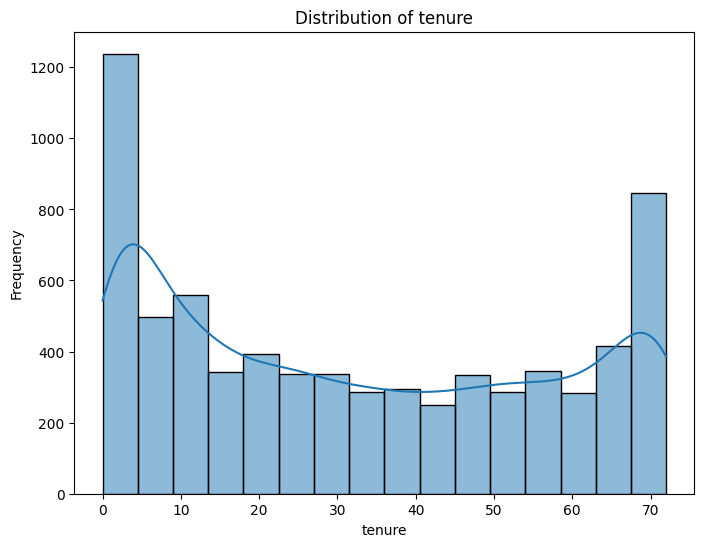

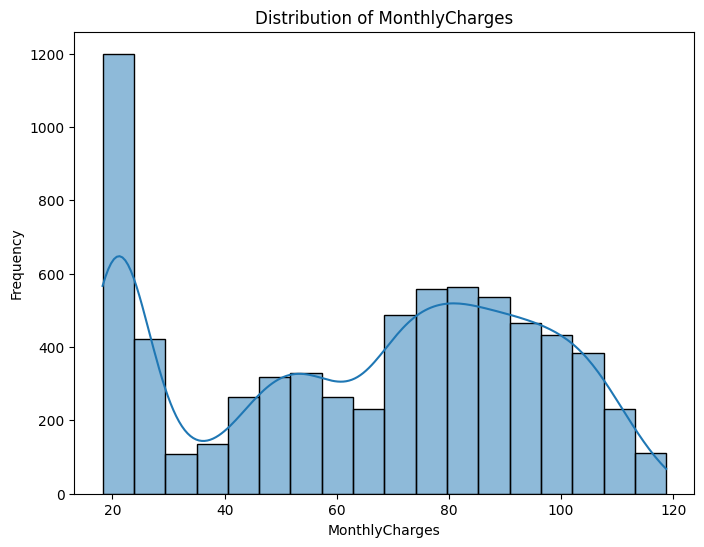

In [7]:

# Plot the distribution of each numerical feature
for column in numerical_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(numerical_df[column], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

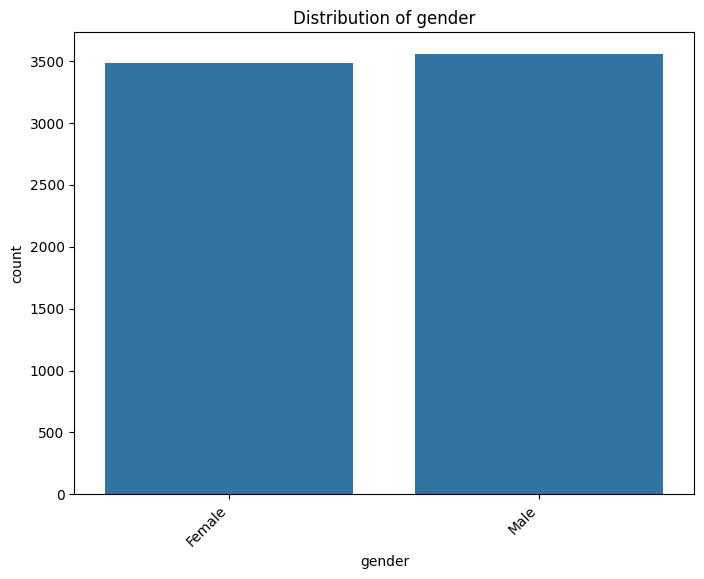

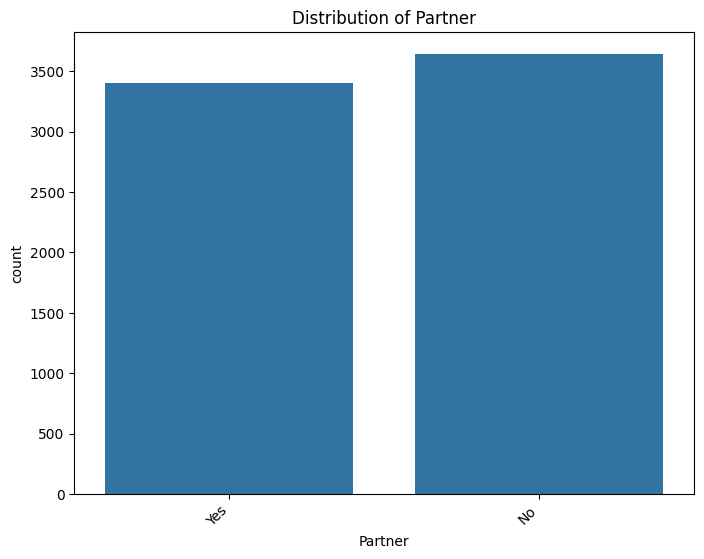

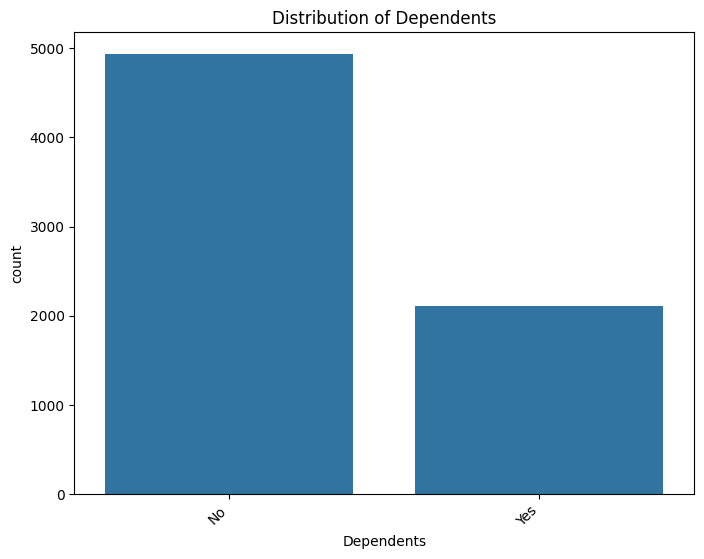

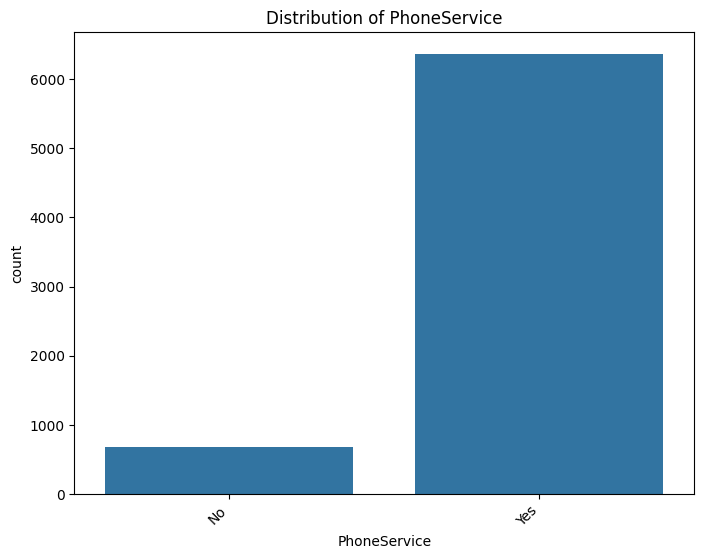

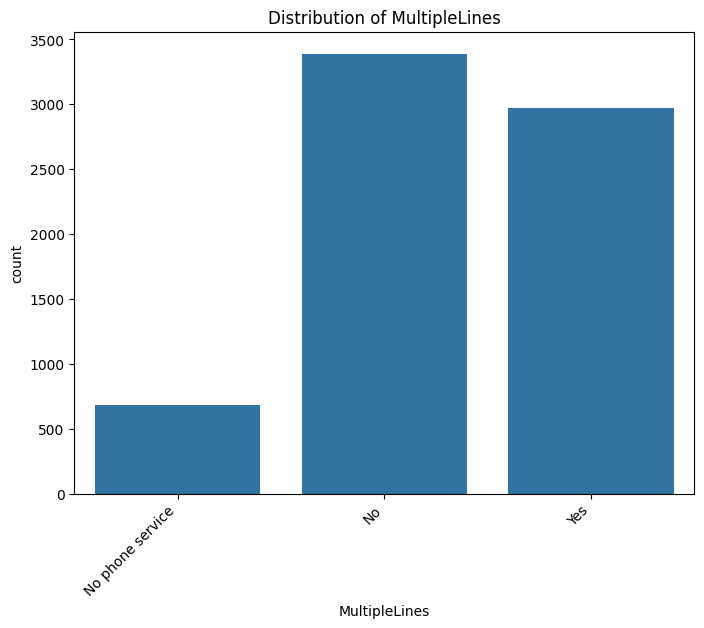

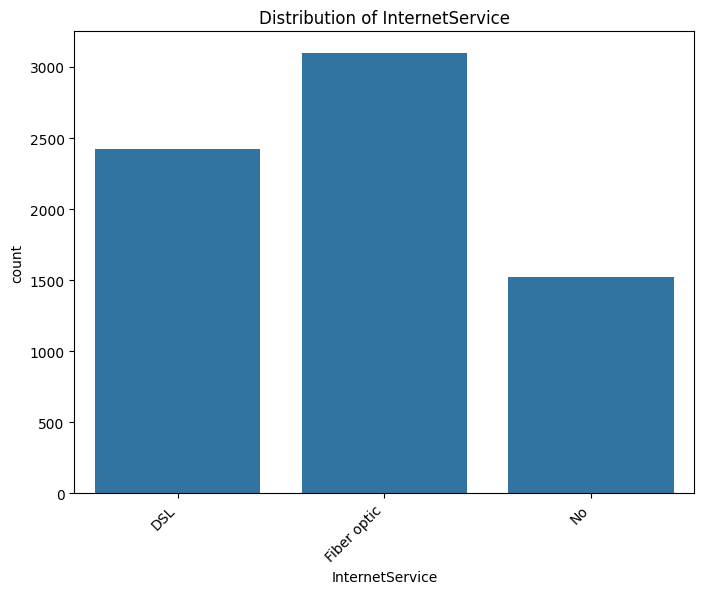

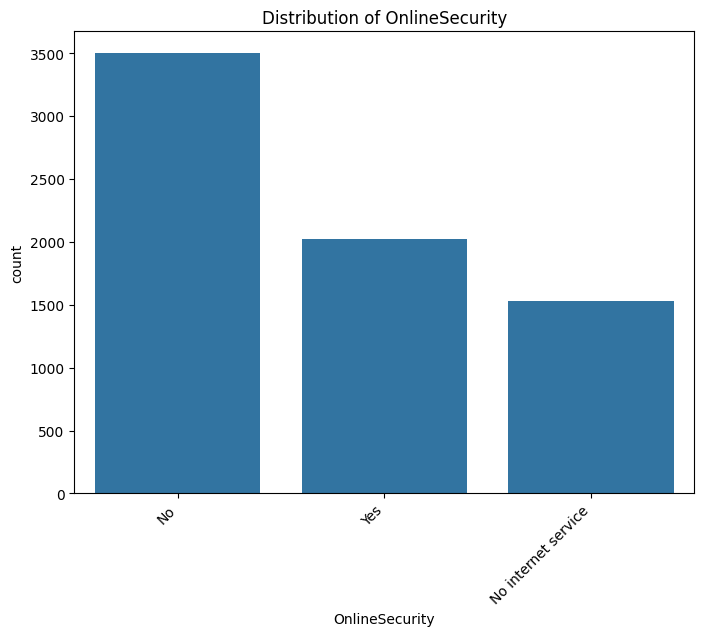

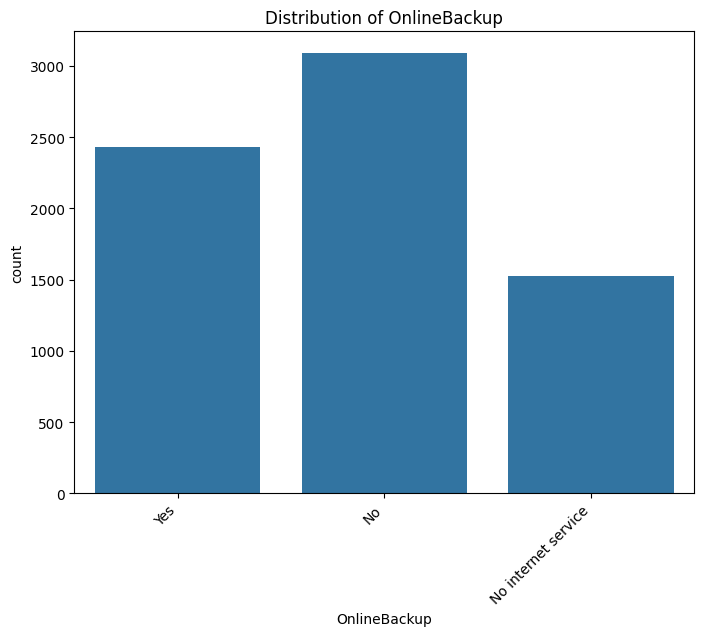

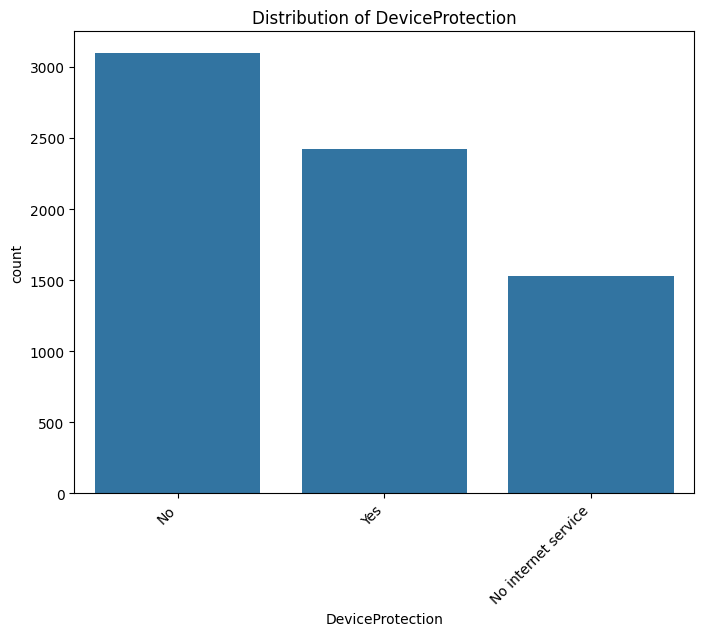

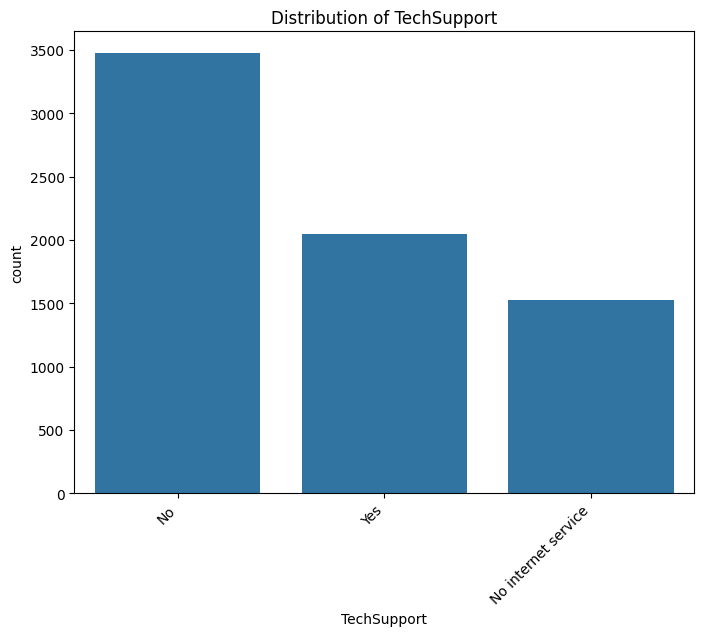

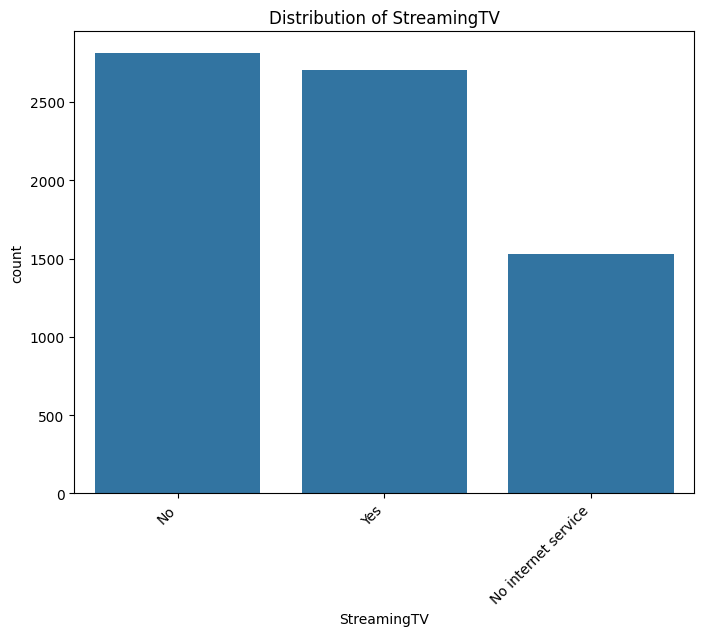

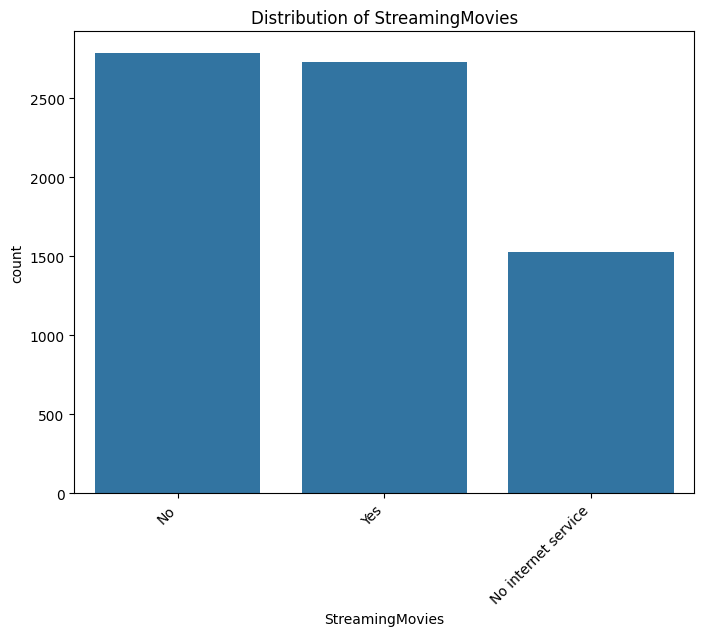

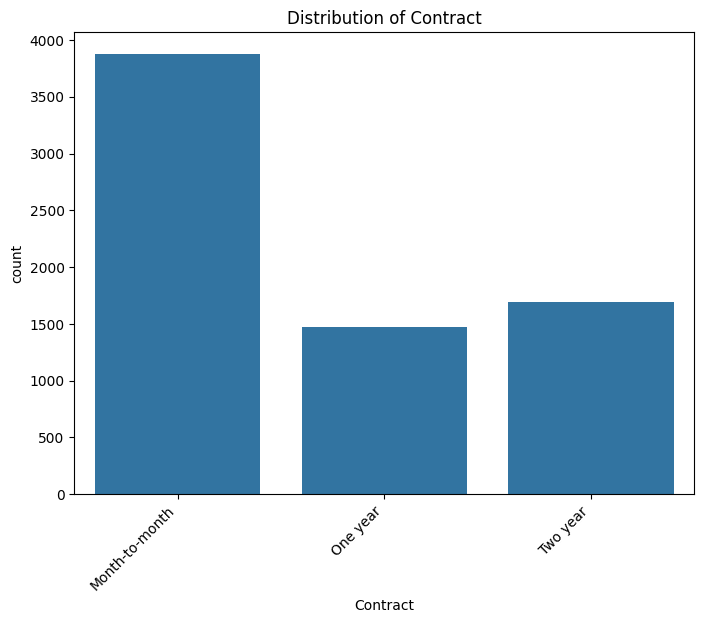

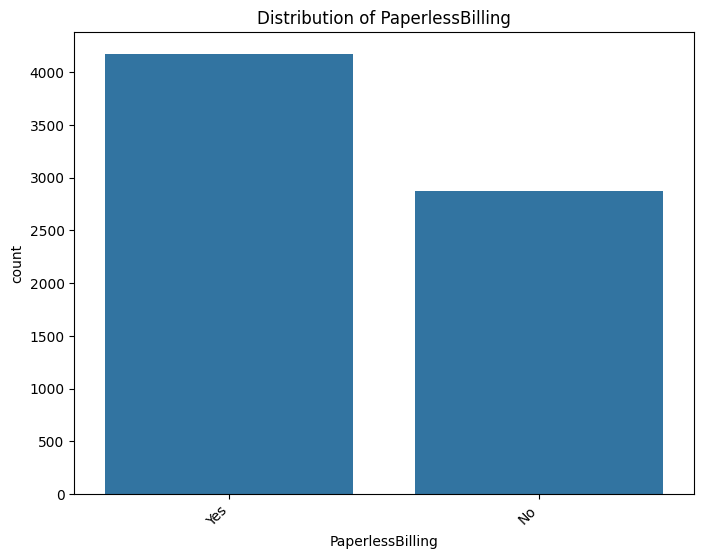

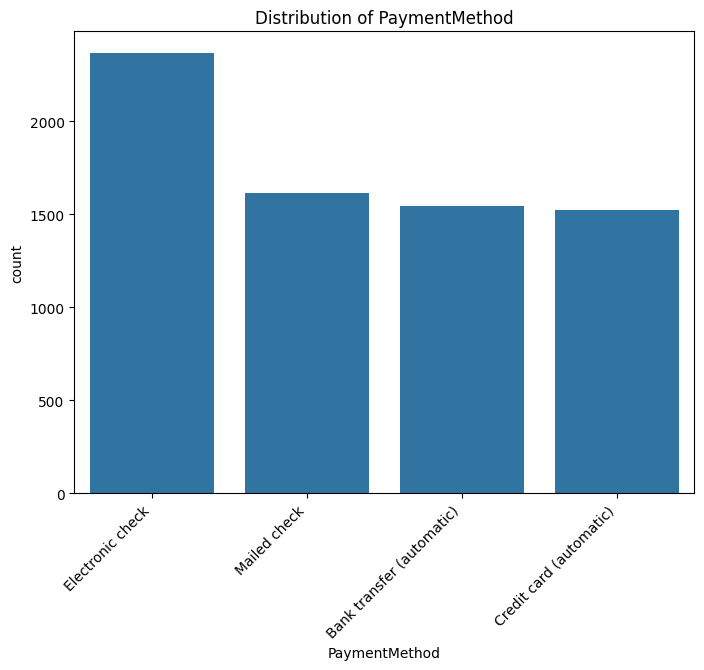

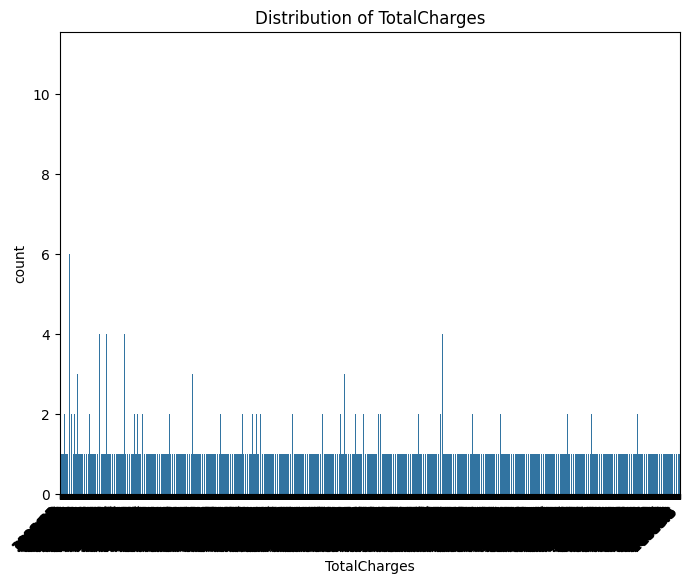

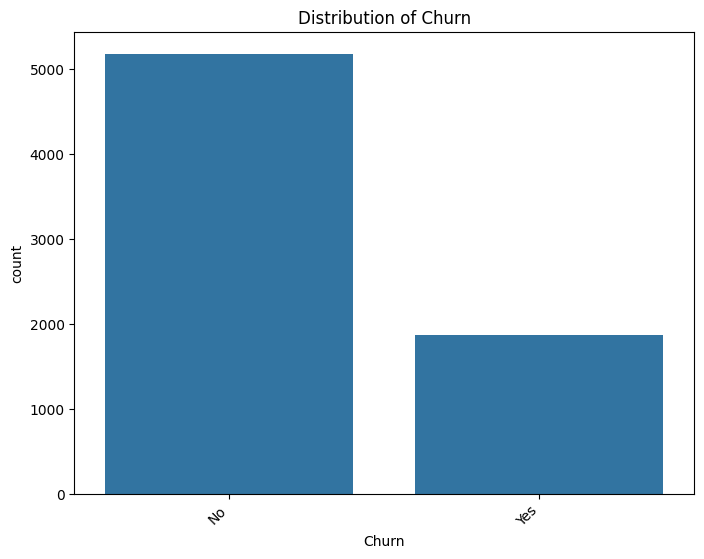

In [8]:
#to understand distribution of categorical variables

import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.show()

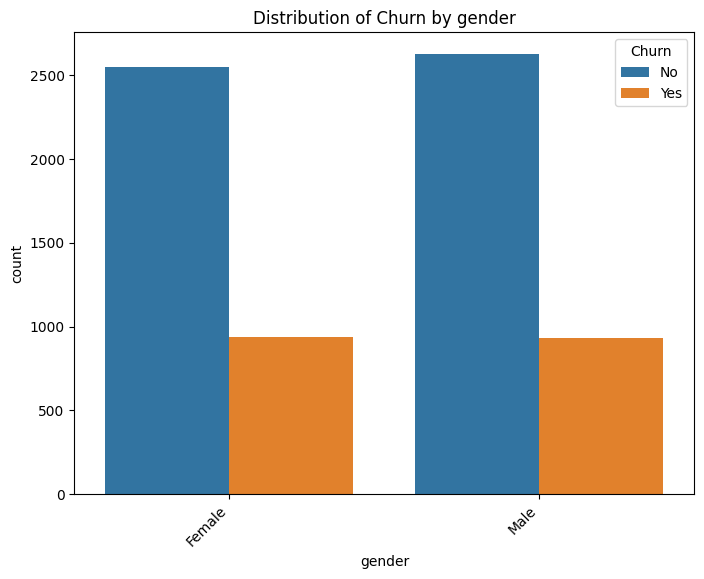

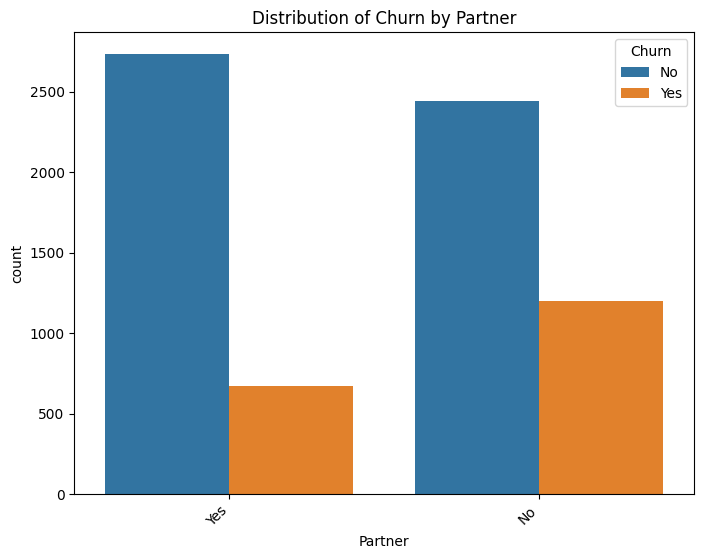

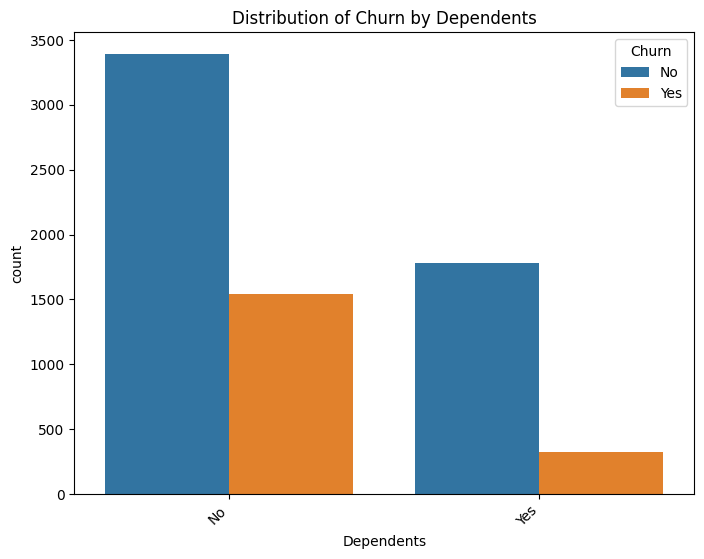

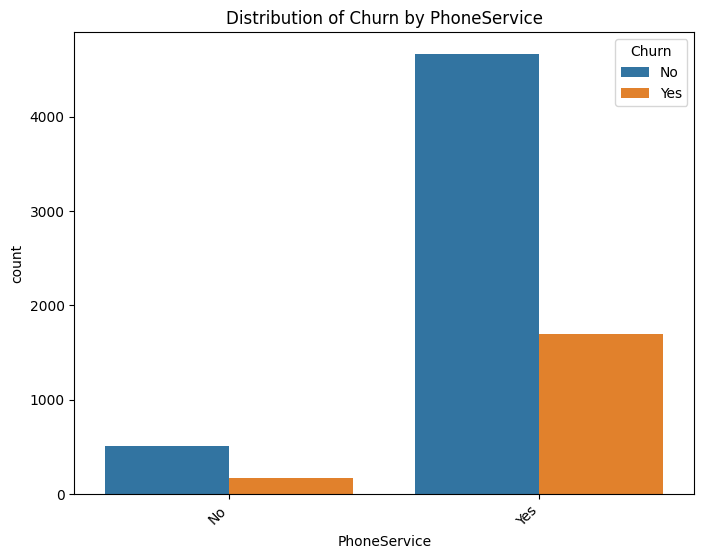

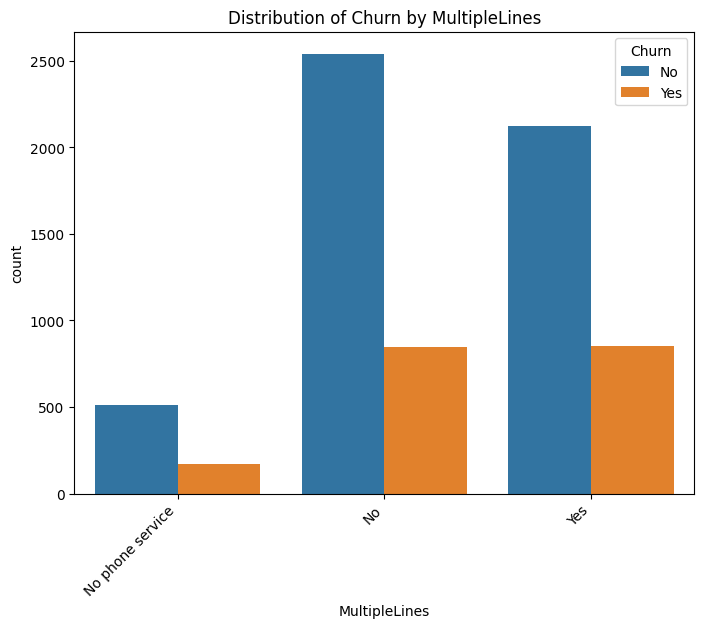

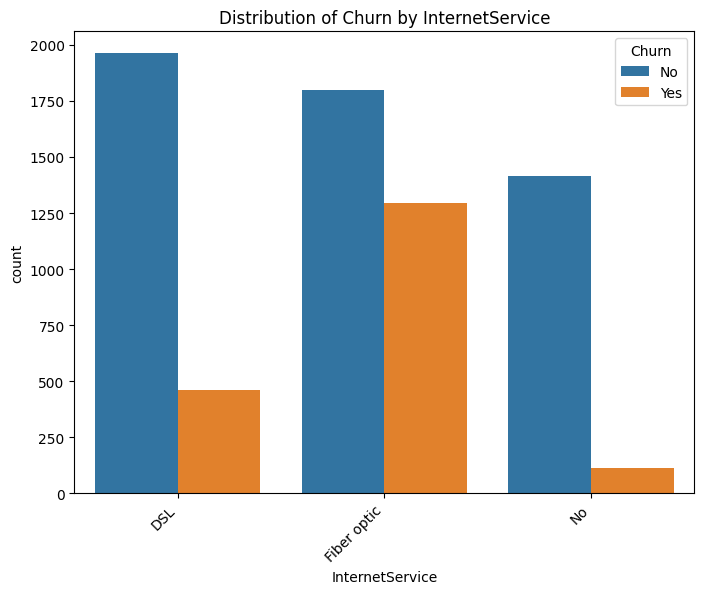

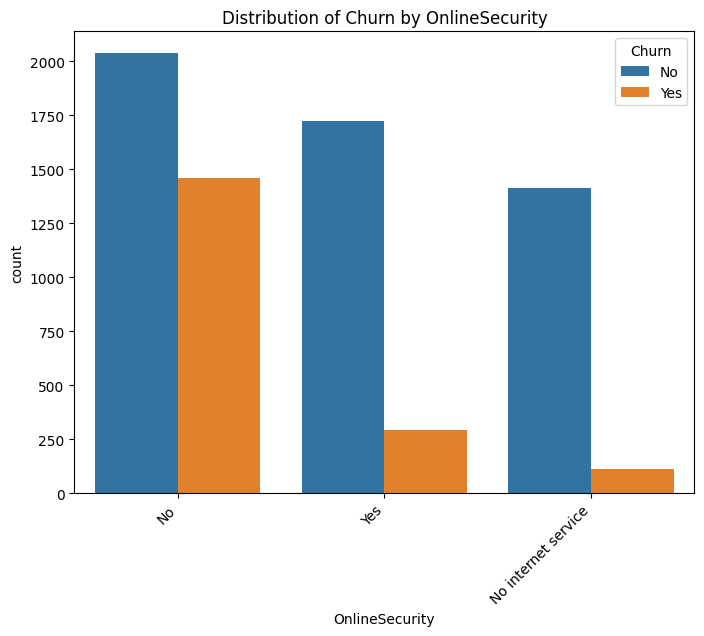

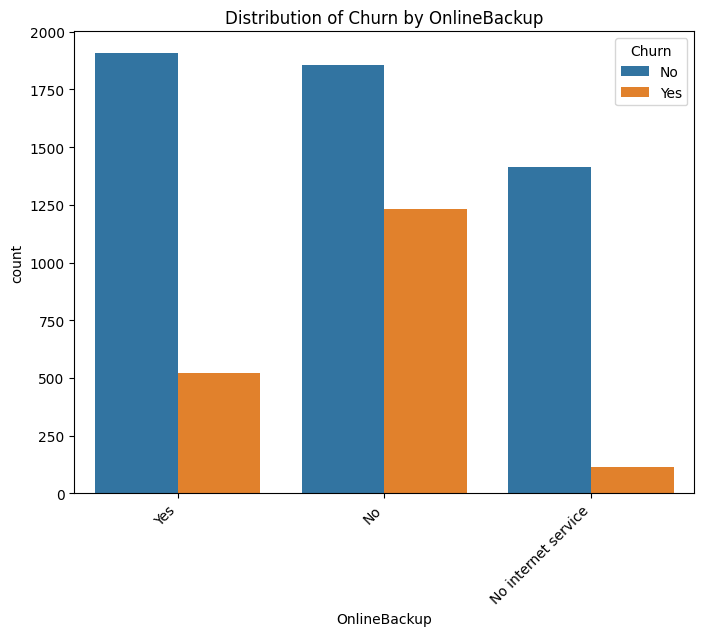

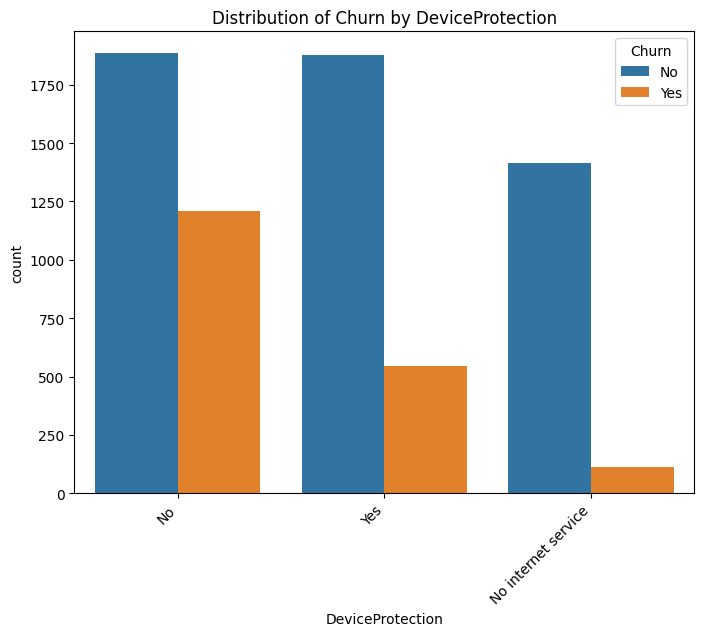

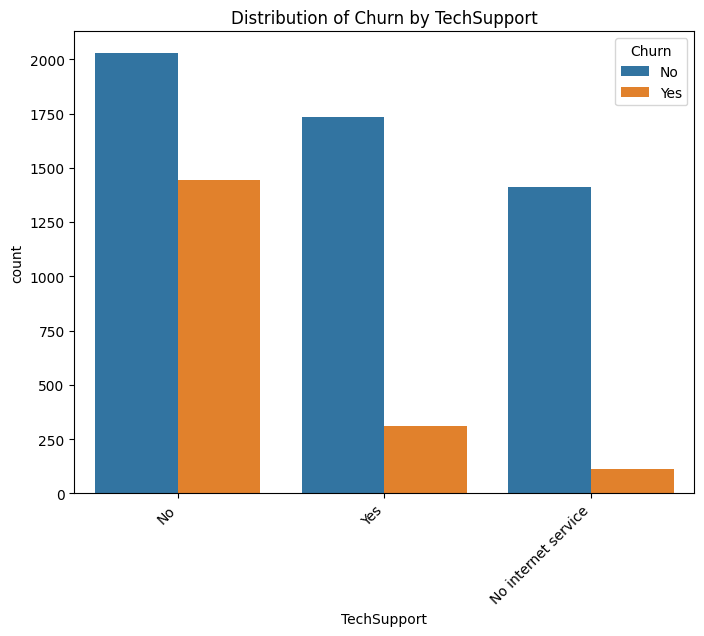

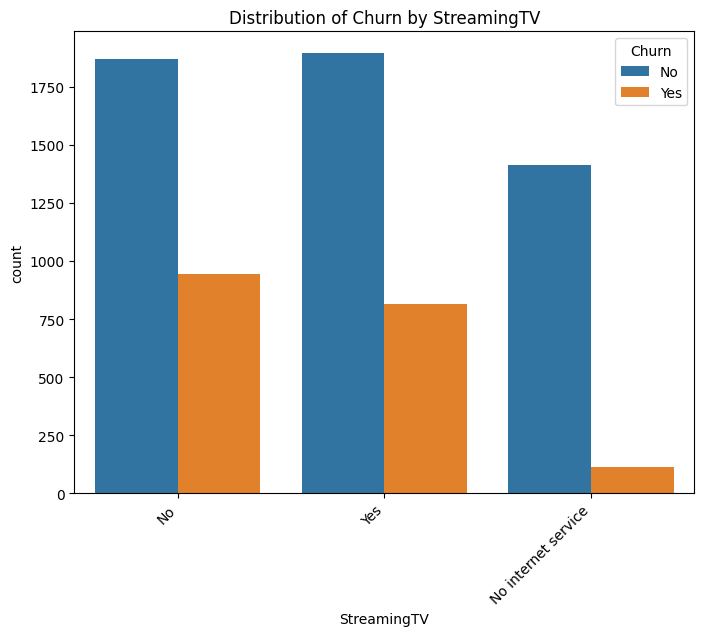

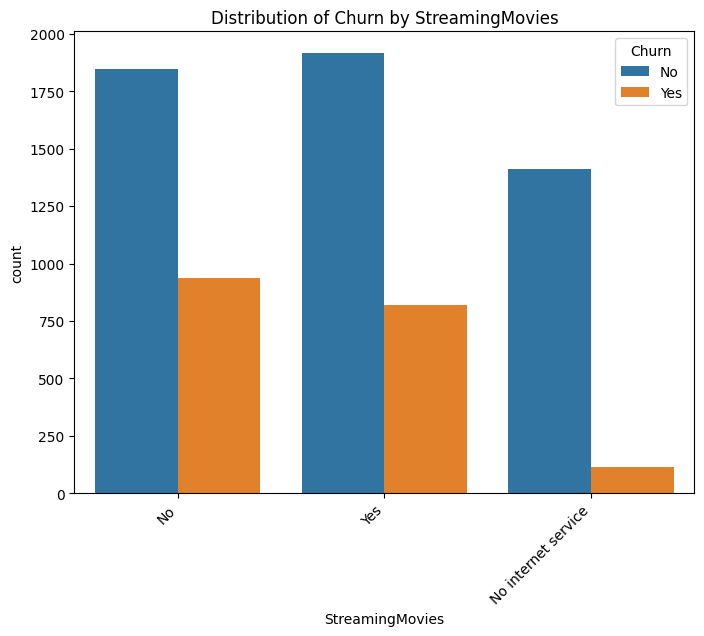

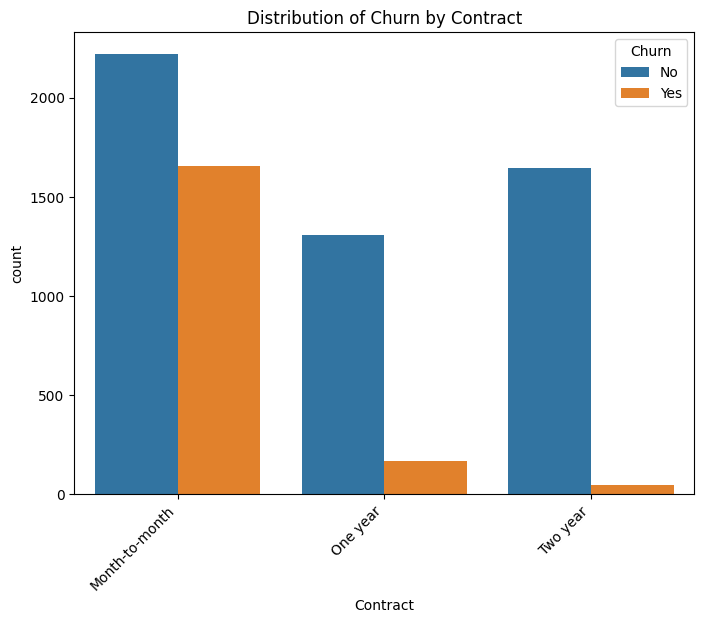

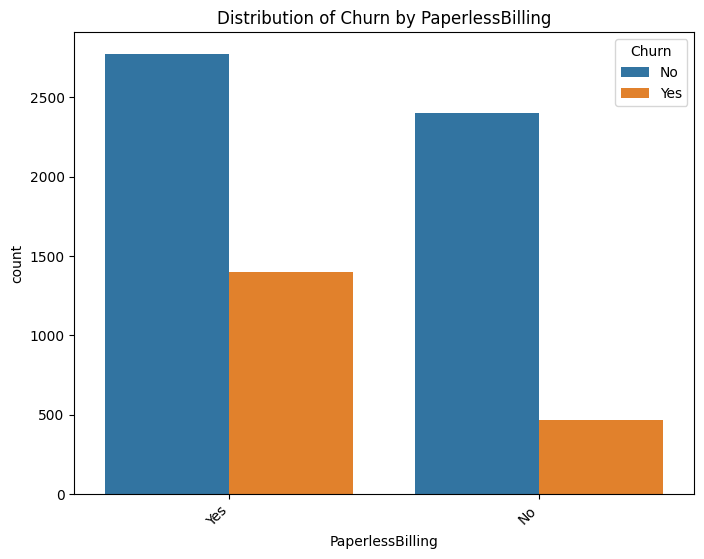

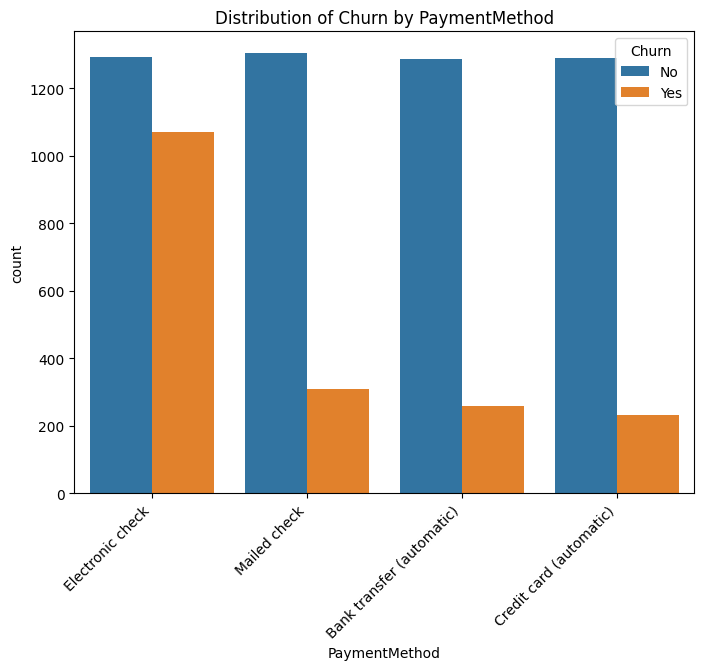

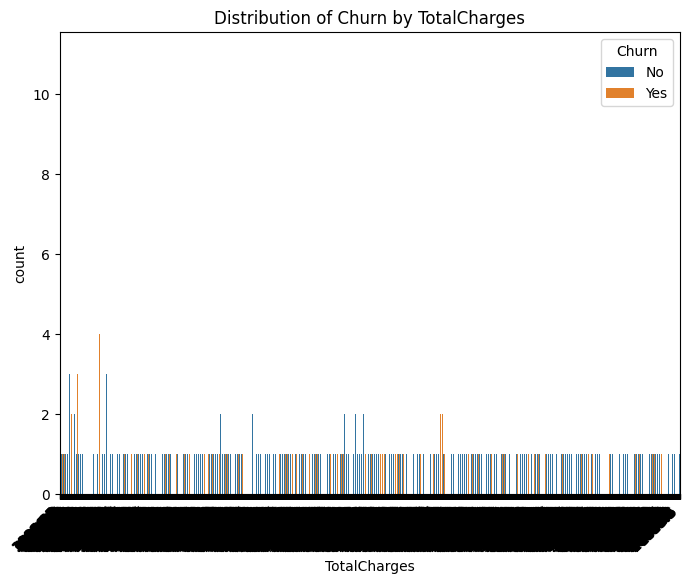

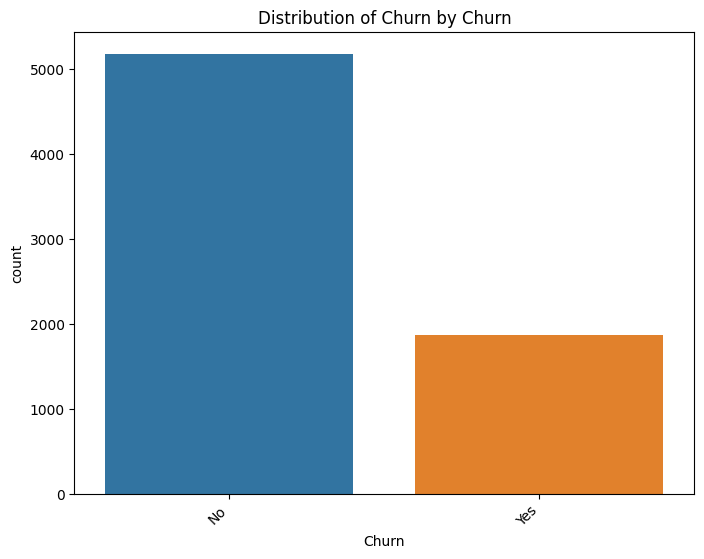

In [9]:
#ro understand independent variable behavior wrt churn
# Assuming 'Churn' is your target variable and 'df' is your dataframe
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribution of Churn by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

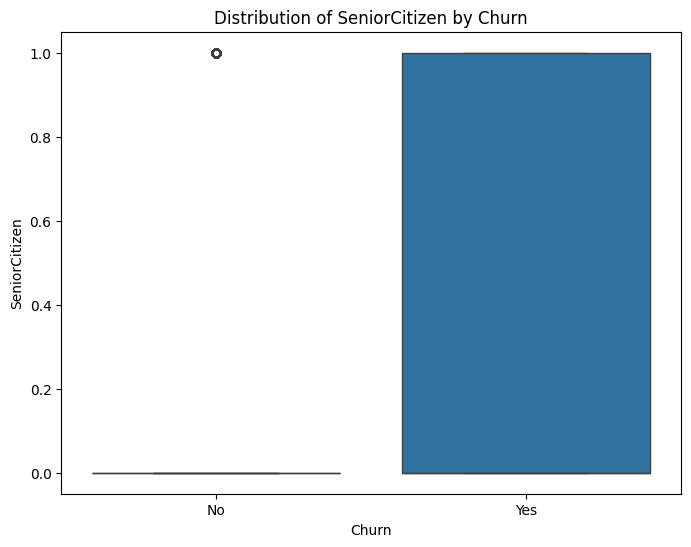

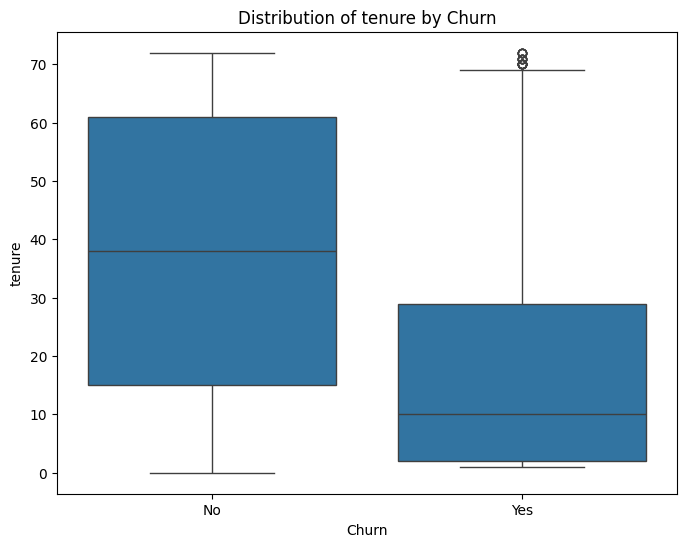

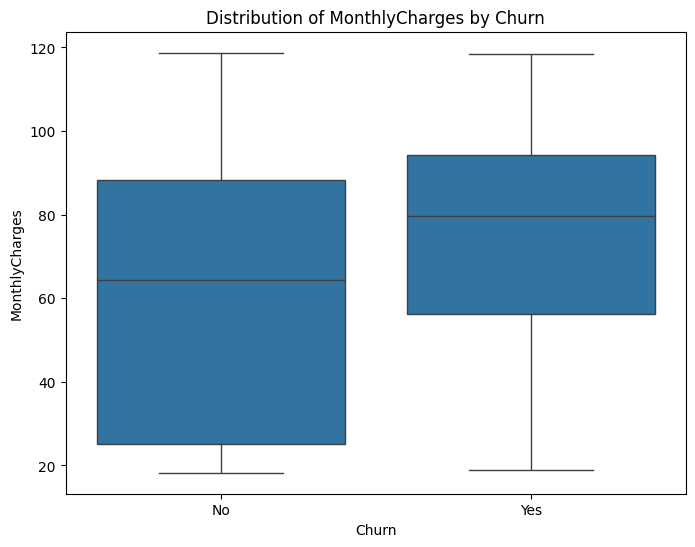

In [10]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report

In [12]:
X = df.drop('Churn', axis =1)
y = df['Churn']

In [13]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# 4. Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = nb_model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.758694109297374


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.90      0.75      0.82      1036
         Yes       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



In [16]:
# Install researchpy if you haven't already
!pip install researchpy

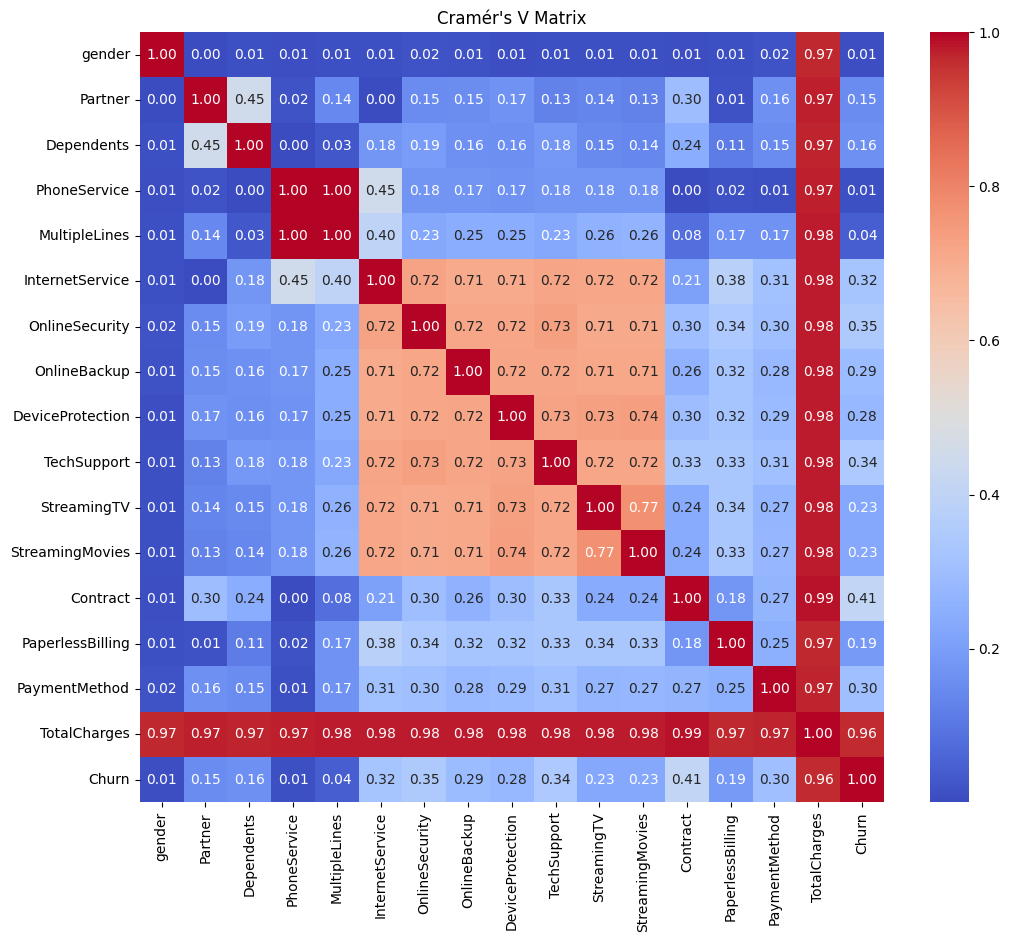

In [17]:
# to understand correaltion between categorical variables, and then feature engineering it
import warnings
import numpy as np
import researchpy as rp
warnings.filterwarnings("ignore")
# Assuming 'df' is your dataframe and 'categorical_cols' is a list of your categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create an empty matrix to store Cramér's V values
num_cols = len(categorical_cols)
cramers_v_matrix = np.zeros((num_cols, num_cols))

# Calculate Cramér's V for all combinations
for i in range(num_cols):
    for j in range(i + 1, num_cols):  # Avoid redundant calculations (symmetric matrix)
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        crosstab, res = rp.crosstab(df[col1], df[col2], test='chi-square')
        cramers_v = res['results'][2]
        cramers_v_matrix[i, j] = cramers_v  # Store in the matrix
        cramers_v_matrix[j, i] = cramers_v  # Make it symmetric
np.fill_diagonal(cramers_v_matrix, 1)
# Create a DataFrame for better visualization
cramers_v_df = pd.DataFrame(cramers_v_matrix, index=categorical_cols, columns=categorical_cols)


# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Matrix")
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
#featrue engineering so that the model can be fast and efficient, these variables because they showed high association
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
cat_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# One-hot encode
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Change here
encoded_cats = encoder.fit_transform(df[cat_cols])

# Apply PCA
pca = PCA(n_components=1)  # Or more if needed
df['combined_cat_pca'] = pca.fit_transform(encoded_cats)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'categorical_cols' is a list of your categorical columns
categorical_cols = ['SeniorCitizen','Partner', 'Dependents', 'Contract','PaymentMethod']  # Replace with your actual categorical column names

# Create a LabelEncoder object
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Clean 'TotalCharges': convert to numeric, coerce errors, then handle NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)  # or use mean()

# Encode target if it's categorical
target_variable = 'Churn'
if df[target_variable].dtype == 'object':
    le = LabelEncoder()
    df[target_variable] = le.fit_transform(df[target_variable])

# Feature columns
feature_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'combined_cat_pca']
categorical_cols = df.select_dtypes(include='object').columns.tolist()  # Identify categorical cols

# One-hot encode categorical variables
X = pd.get_dummies(df[feature_columns + categorical_cols], drop_first=True)
y = df[target_variable]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM classifier
svm_model = SVC(kernel='poly', C=1.0)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1036
           1       0.69      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [23]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier


# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7267565649396736
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.48      0.49      0.48       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [24]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier


# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7934705464868701
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.64      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# --- 1. Check if GPU is being used ---
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Using GPU:", tf.test.gpu_device_name())

# --- 2. Data Preprocessing ---

# Convert TotalCharges to numeric (handle errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode target variable
target_variable = 'Churn'
if df[target_variable].dtype == 'object':
    le = LabelEncoder()
    df[target_variable] = le.fit_transform(df[target_variable])

# Define features
feature_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'combined_cat_pca']
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# One-hot encoding
X = pd.get_dummies(df[feature_columns + categorical_cols], drop_first=True)
y = df[target_variable]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 3. Build and Train Neural Network ---
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using GPU
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=64,  # Larger batch size for GPU
                        verbose=1)

# --- 4. Evaluate ---
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Num GPUs Available: 1
Using GPU: /device:GPU:0
Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7493 - loss: 0.5023 - val_accuracy: 0.7968 - val_loss: 0.4420
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7899 - loss: 0.4527 - val_accuracy: 0.7986 - val_loss: 0.4318
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7798 - loss: 0.4523 - val_accuracy: 0.8066 - val_loss: 0.4239
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7905 - loss: 0.4387 - val_accuracy: 0.8083 - val_loss: 0.4221
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7865 - loss: 0.4510 - val_accuracy: 0.8057 - val_loss: 0.4253
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7875 - loss: 0.4438 - val_accuracy: 0.8092 - val_loss: 0.4208
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7961 - loss: 0.4459 - val_accuracy: 0.8092 - val_loss: 0.4217
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [26]:

cm = confusion_matrix(y_test, y_pred)
cm

array([[934, 102],
       [189, 184]])